# Card-Heining-Kline event study

## Import the BipartitePandas package

Make sure to install it using `pip install bipartitepandas`.

In [1]:
import bipartitepandas as bpd

## Get your data ready

For this notebook, we simulate data.

In [2]:
df = bpd.SimBipartite().simulate()
bdf = bpd.BipartiteDataFrame(i=df['i'], j=df['j'], y=df['y'], t=df['t']).clean()
display(bdf)

checking required columns and datatypes
sorting rows
dropping NaN observations
generating 'm' column
keeping highest paying job for i-t (worker-year) duplicates (how='max')
dropping workers who leave a firm then return to it (how=False)
making 'i' ids categorical
making 'j' ids categorical
computing largest connected set (how=None)
sorting columns
resetting index


,i,j,y,t,m
0,0,33,-1.915759,0,0
1,0,33,-2.115335,1,0
2,0,33,-2.009425,2,0
3,0,33,-2.552998,3,1
4,0,70,-1.967231,4,1
...,...,...,...,...,...
49995,9999,191,4.381963,0,1
49996,9999,199,3.131870,1,2
49997,9999,130,1.077723,2,2
49998,9999,108,2.563290,3,1


## Creating CHK event study plot

#### Cluster data

We need to cluster the data using quartiles of firm-level mean income.

In [3]:
measures = bpd.measures.Moments(measures='mean')
grouping = bpd.grouping.Quantiles(n_quantiles=4)
bdf = bdf.cluster(bpd.cluster_params({'measures': measures, 'grouping': grouping}))

#### Plot

Once the data is clustered, we can generate the event study plots.

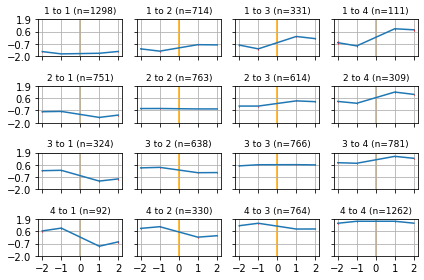

In [4]:
bdf.plot_extended_eventstudy(periods_pre=2, periods_post=2)

<div class="alert alert-warning">

Warning

Be careful not to include too many clusters!

</div>

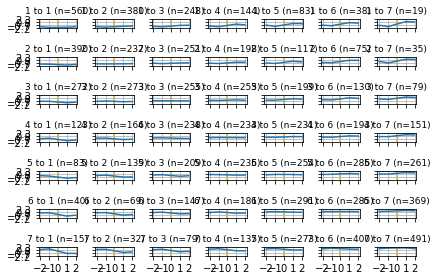

In [5]:
measures = bpd.measures.Moments(measures='mean')
grouping = bpd.grouping.Quantiles(n_quantiles=7)
bdf = bdf.cluster(bpd.cluster_params({'measures': measures, 'grouping': grouping}))
bdf.plot_extended_eventstudy(periods_pre=2, periods_post=2)